#### Time Series Analysis and Seasonal Decomposition

For this analysis, will be using pandas, observing seasonality and understanding the general trend of a series

Objectives
* Understand the seasonality and trend of a series
* Decompose a time series additive model
* Implement time series with an additive model

For this time series analysis i will be using the international airline passangers dataset found [here](kaggle.com/datasets/andreazzini/international-airline-passengers)

Ref: [youtube](youtube.com/watch?v=0fWa9-Vj89g&list=PPSV)

In [1]:
import pandas as pd

In [2]:
# importing our dataset
data = pd.read_csv('international-airline-passengers.csv')

In [3]:
data.head(2)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0


In [4]:
data.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [5]:
data.dtypes

Month                                                                              object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    float64
dtype: object

In [6]:
# changing the column name because of the length

data = data.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Airpassengers'})
print(data.columns)

Index(['Month', 'Airpassengers'], dtype='object')


In [7]:
data.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Airpassengers'}, inplace=True)
print(data.columns)

Index(['Month', 'Airpassengers'], dtype='object')


In [8]:
data.columns

Index(['Month', 'Airpassengers'], dtype='object')

In [9]:
data.dtypes

Month             object
Airpassengers    float64
dtype: object

In [10]:
data.head()

,Month,Airpassengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [11]:
# checking for null values

data.isnull().sum()

Month            0
Airpassengers    1
dtype: int64

In [12]:
# replace missing values with the mean of the column

data['Airpassengers'].fillna(data['Airpassengers'].mean(), inplace=True)

In [13]:
data.isnull().sum()

Month            0
Airpassengers    0
dtype: int64

In [15]:
''' The month column is seen as a string as an object, we will change the datatype to datetime objects which allows us to do arithematic between dates,
so we can calculate intervals or group data by specific time intervals '''

data['Month']=pd.to_datetime(data['Month'])
data.head()

ValueError: ('Unknown string format:', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60')

##### Trying to find out the reason for the error 

In [16]:
print(data['Month'].unique())

['1949-01' '1949-02' '1949-03' '1949-04' '1949-05' '1949-06' '1949-07'
 '1949-08' '1949-09' '1949-10' '1949-11' '1949-12' '1950-01' '1950-02'
 '1950-03' '1950-04' '1950-05' '1950-06' '1950-07' '1950-08' '1950-09'
 '1950-10' '1950-11' '1950-12' '1951-01' '1951-02' '1951-03' '1951-04'
 '1951-05' '1951-06' '1951-07' '1951-08' '1951-09' '1951-10' '1951-11'
 '1951-12' '1952-01' '1952-02' '1952-03' '1952-04' '1952-05' '1952-06'
 '1952-07' '1952-08' '1952-09' '1952-10' '1952-11' '1952-12' '1953-01'
 '1953-02' '1953-03' '1953-04' '1953-05' '1953-06' '1953-07' '1953-08'
 '1953-09' '1953-10' '1953-11' '1953-12' '1954-01' '1954-02' '1954-03'
 '1954-04' '1954-05' '1954-06' '1954-07' '1954-08' '1954-09' '1954-10'
 '1954-11' '1954-12' '1955-01' '1955-02' '1955-03' '1955-04' '1955-05'
 '1955-06' '1955-07' '1955-08' '1955-09' '1955-10' '1955-11' '1955-12'
 '1956-01' '1956-02' '1956-03' '1956-04' '1956-05' '1956-06' '1956-07'
 '1956-08' '1956-09' '1956-10' '1956-11' '1956-12' '1957-01' '1957-02'
 '1957

##### can see that there is a row with tha value 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60' , will find the row and drop it

In [17]:
# Find the index of the row that contains the invalid value
invalid_index = data[data['Month'] == 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].index


In [18]:
# Drop the row that contains the invalid value
data.drop(invalid_index, inplace=True)

In [19]:
# checking the again for the unique values of my column

print(data['Month'].unique())

['1949-01' '1949-02' '1949-03' '1949-04' '1949-05' '1949-06' '1949-07'
 '1949-08' '1949-09' '1949-10' '1949-11' '1949-12' '1950-01' '1950-02'
 '1950-03' '1950-04' '1950-05' '1950-06' '1950-07' '1950-08' '1950-09'
 '1950-10' '1950-11' '1950-12' '1951-01' '1951-02' '1951-03' '1951-04'
 '1951-05' '1951-06' '1951-07' '1951-08' '1951-09' '1951-10' '1951-11'
 '1951-12' '1952-01' '1952-02' '1952-03' '1952-04' '1952-05' '1952-06'
 '1952-07' '1952-08' '1952-09' '1952-10' '1952-11' '1952-12' '1953-01'
 '1953-02' '1953-03' '1953-04' '1953-05' '1953-06' '1953-07' '1953-08'
 '1953-09' '1953-10' '1953-11' '1953-12' '1954-01' '1954-02' '1954-03'
 '1954-04' '1954-05' '1954-06' '1954-07' '1954-08' '1954-09' '1954-10'
 '1954-11' '1954-12' '1955-01' '1955-02' '1955-03' '1955-04' '1955-05'
 '1955-06' '1955-07' '1955-08' '1955-09' '1955-10' '1955-11' '1955-12'
 '1956-01' '1956-02' '1956-03' '1956-04' '1956-05' '1956-06' '1956-07'
 '1956-08' '1956-09' '1956-10' '1956-11' '1956-12' '1957-01' '1957-02'
 '1957

In [22]:
# counting number of rows in my dataframe
num_rows = len(data)
print(num_rows)

144


In [23]:
# Count the number of non-null values in each column
counts = data.count()
print(counts)

Month            144
Airpassengers    144
dtype: int64


##### Now lets continue from where we stopped, changing the datatype tp datetime object

In [24]:
data['Month']=pd.to_datetime(data['Month'])
data.head()

,Month,Airpassengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [25]:
# checking the datatypes again

data.dtypes

Month            datetime64[ns]
Airpassengers           float64
dtype: object

In [26]:
# changing to datetime object enables you to access different components of the date like the year, month and day
# for example to access the year alone
data['Month'].dt.year.head()

0    1949
1    1949
2    1949
3    1949
4    1949
Name: Month, dtype: int64

In [30]:
# use the datetime object as an index of the df itself because we can use it to expliot more powerful features like  
# e.g analyse sequences or compute relative values and so on

data = data.set_index('Month')
data.head()

,Airpassengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


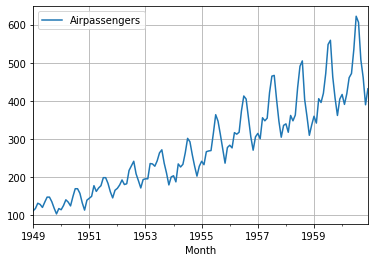

In [32]:
# using matplolib inline, we can plot the data

%matplotlib inline

data.plot(grid = 'on');

##### Note
In Jupyter notebooks, the percent sign (%) is used to indicate a magic command. Magic commands are special commands that are not part of the Python language, but are specific to Jupyter notebooks and provide additional functionality.

The %matplotlib inline command is a magic command that sets the backend of matplotlib to the 'inline' backend, which allows plots to be displayed directly in the notebook output. This command needs to be executed only once per notebook session and it allows you to create and display matplotlib plots without having to use plt.show() command after each plot.

The inline backend renders the plots as static images, which are displayed directly in the notebook output. If you want to interact with the plots (e.g., zoom in/out, pan, etc.), you can use the %matplotlib notebook command instead, which enables the 'notebook' backend. However, note that the 'notebook' backend requires more resources and can be slower than the 'inline' backend.

It's worth noting that magic commands are not part of the Python language, so they cannot be used outside of Jupyter notebooks.





##### From the plot above we can see that;

Overtime the airline has more passengers, so there are ups and downs but the trend is generally increasing 

The up and down trend seem regular, which might be indicating a seasonal pattern.

Taking a closer look, we can use the use the datetime object from the standard library to indicate a time interval starting from January 1959 until December 1960. Simply observing a couple of consecutive years.

will use the boolean indexing over the dataframe to retrive elements for the index which is our data is greater than the starting date and lower than the end date and plot it again

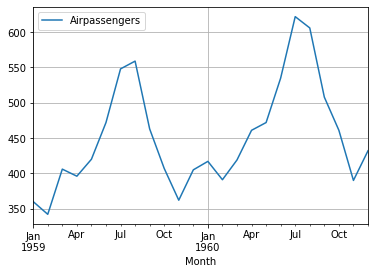

In [35]:
from datetime import datetime

start_date = datetime(1959, 1, 1)
end_date = datetime(1960, 12, 1)
data[(start_date <= data.index) & (data.index <= end_date)].plot(grid='on');

### Decomposition of a Time Series

Types of Models
* Additive Model: components of a time series are simply added together
* Multiplicative model: components are multiplied together

###### Additive Model

Y(t) = Trend(t) + Seasonality(t) + Residual(t)

Residual = Expectation - Observation

will use the the seasonal_decompose() method from the statsmodels.api module to decompose the time series into its components: trend, seasonal, and residual.


###### Note
The seasonal_decompose() method takes a time series as input and returns a DecomposeResult object, which contains the decomposed components. The model parameter specifies the decomposition model to be used, which can be 'additive' or 'multiplicative'.

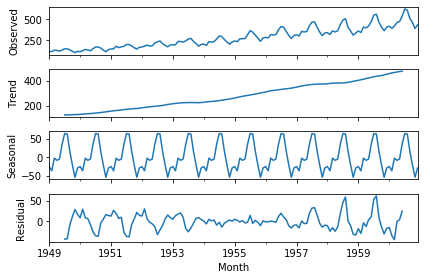

In [37]:
# import the statsmodels.api and then plot the the decomposed components using the plot() method of the DecomposeResult object. 

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot();

The resulting plot shows four subplots: the original time series, the trend component, the seasonal component, and the residual component.

interpretation;
we have a trend going up and seasonality which follow regular pattern

In [40]:
# doubling up default plot size

import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

###### Note:
This code sets the default size of Matplotlib figures to 12 inches by 8 inches by modifying the rcParams dictionary in Matplotlib.

rcParams is a dictionary-like object that contains the default settings for Matplotlib. By modifying the values in this dictionary, you can change the default behavior of Matplotlib.

The matplotlib.rcParams['figure.figsize']=[12.0,8.0] line sets the value of the 'figure.figsize' key in the rcParams dictionary to a list of two values, [12.0,8.0], which represents the width and height of the figure in inches, respectively. This means that any subsequent figures created using Matplotlib will have a default size of 12 inches by 8 inches, unless explicitly specified otherwise.





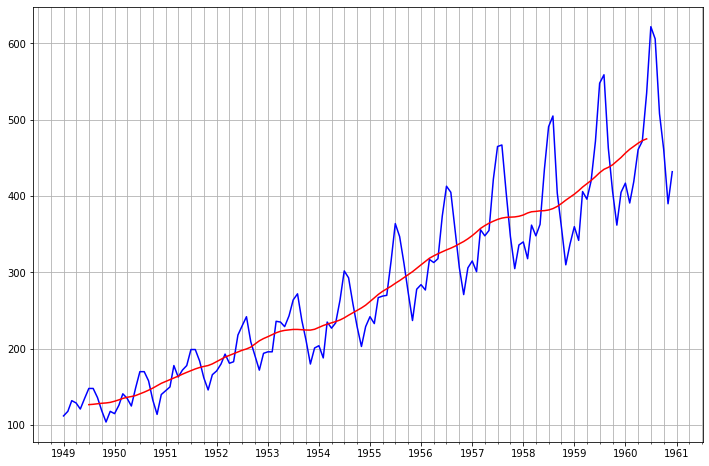

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which ='minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(data.index, data['Airpassengers'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c= 'red')


###### Note:

The code creates a plot of time series data with multiple lines and custom tick labels using Matplotlib.

The first few lines import the necessary Matplotlib modules, pyplot and dates.

Next, the code creates a figure and axes object using subplots(). It also sets the grid lines to be displayed on the plot by calling grid(True) on the axes object.

Then, the code creates two locators for the x-axis: one for the years and another for the months. The YearLocator sets the tick positions at the beginning of each year, while the MonthLocator sets the tick positions at the beginning of every third month.

After that, the code creates two DateFormatter objects to format the tick labels. One formats the year as a four-digit number, while the other formats the month as a two-digit number.

The code then sets the minor locator to the month locator and the major locator to the year locator, and sets the major formatter to the year formatter using the xaxis attribute of the axes object.

Finally, the code plots two lines on the axes object. One line represents the original time series data, while the other represents the trend component obtained from time series decomposition. The c parameter sets the color of the lines to blue and red, respectively.



